In [192]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
import pylab as pl

In [193]:
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [194]:
s=os.getcwd()
print(s)
pd.set_option('display.max_columns', 10)

C:\Users\sugan


In [195]:
# Loading the Data

In [196]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
cats = pd.read_csv('item_categories.csv')
sales_train = pd.read_csv('sales_train.csv')
sales_test = pd.read_csv('sales_test.csv')

In [197]:
items.head(n=2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [198]:
shops.head(n=2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [199]:
cats.head(n=2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [200]:
sales_train.head(n=2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00


In [201]:
sales_test.head(n=2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [202]:
Counter(sales_train.date_block_num).most_common()[:10]

[(11, 143246),
 (23, 130786),
 (2, 121347),
 (0, 115690),
 (1, 108613),
 (7, 104772),
 (6, 100548),
 (5, 100403),
 (12, 99349),
 (10, 96736)]

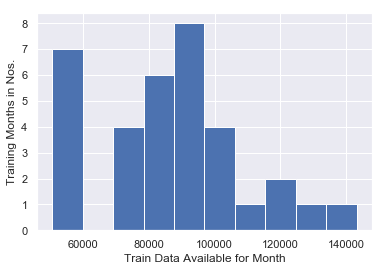

In [203]:
date_data_counts = [count for _, count in Counter(sales_train.date_block_num).most_common()]
plt.hist(date_data_counts)
plt.xlabel("Train Data Available for Month")
plt.ylabel("Training Months in Nos.")
plt.show()

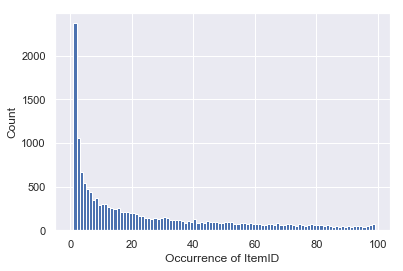

In [204]:
item_id_counts = [count for _, count in Counter(sales_train.item_id).most_common()]
plt.hist(item_id_counts, bins=range(0,100))
plt.xlabel("Occurrence of ItemID")
plt.ylabel("Count")
plt.show()

In [205]:
# how many item ids don't appear in the test data?
total_train_items = len(set(sales_train.item_id))
total_test_items_in_train = len(set(sales_train.item_id) & set(test.item_id))
total_test_items = len(set(test.item_id))
print("Total percentage of train item_ids that also appear in the test data:", total_test_items_in_train / total_train_items)
total_train_items, total_test_items, total_test_items_in_train

Total percentage of train item_ids that also appear in the test data: 0.21722382721144587


(21807, 5100, 4737)

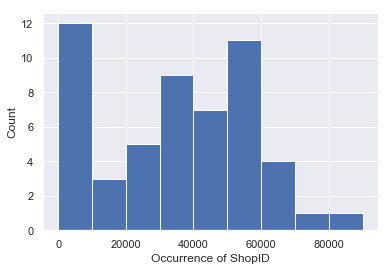

In [206]:
shop_id_counts = [count for _, count in Counter(sales_train.shop_id).most_common()]
plt.hist(shop_id_counts, bins=range(0, 100000, 10000))
plt.xlabel("Occurrence of ShopID")
plt.ylabel("Count")
plt.show()

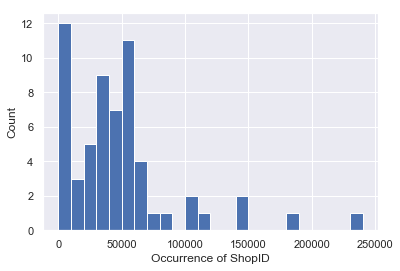

In [207]:
plt.hist(shop_id_counts, bins=range(0, 250000, 10000))
plt.xlabel("Occurrence of ShopID")
plt.ylabel("Count")
plt.show()

In [208]:
# how many shop ids don't appear in the test data?
total_train_shops = len(set(sales_train.shop_id))
total_test_shops_in_train = len(set(sales_train.shop_id) & set(test.shop_id))
total_test_shops = len(set(test.shop_id))
print("% of Shops in train data appearing in test data:", total_test_shops_in_train / total_train_shops)
total_train_shops, total_test_shops, total_test_shops_in_train

% of Shops in train data appearing in test data: 0.7


(60, 42, 42)

In [209]:
merged = sales_train.merge(items, on="item_id", how="left").drop(columns="item_name")
assert len(merged) == len(sales_train)
sales_train = merged

In [210]:
sales_train.head(n=10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.00,37
1,03.01.2013,0,25,2552,899.00,1.00,58
2,05.01.2013,0,25,2552,899.00,-1.00,58
3,06.01.2013,0,25,2554,1709.05,1.00,58
4,15.01.2013,0,25,2555,1099.00,1.00,56
5,10.01.2013,0,25,2564,349.00,1.00,59
6,02.01.2013,0,25,2565,549.00,1.00,56
7,04.01.2013,0,25,2572,239.00,1.00,55
8,11.01.2013,0,25,2572,299.00,1.00,55
9,03.01.2013,0,25,2573,299.00,3.00,55


In [211]:
len(set(sales_train.item_category_id))

84

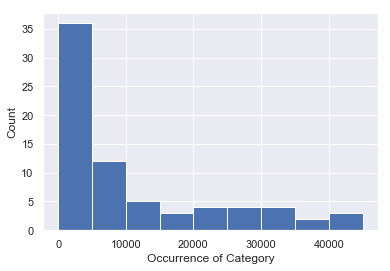

In [212]:
shopID_counts = [count for _, count in Counter(sales_train.item_category_id).most_common()]
plt.hist(shopID_counts, bins=range(0, 50000, 5000))
plt.xlabel("Occurrence of Category")
plt.ylabel("Count")
plt.show()


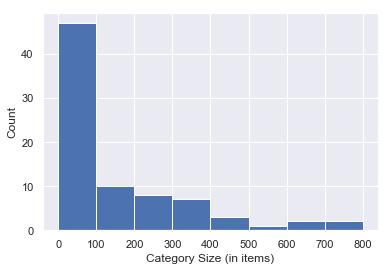

[4964, 2327, 1777, 1100, 769]
% items in top 5 categories: 0.5015362039712019


In [213]:
cat_item_counts = []
for category in set(sales_train.item_category_id):
    items_in_cat = len(set(sales_train[sales_train.item_category_id == category].item_id))
    cat_item_counts.append(items_in_cat)
assert sum(cat_item_counts) == total_train_items
plt.hist(cat_item_counts, bins=range(0, 900, 100))
plt.xlabel("Category Size (in items)")
plt.ylabel("Count")
plt.show()
# The majority of categories contain fewer than 100 items
cat_item_counts = sorted(cat_item_counts, reverse=True)
print(cat_item_counts[:5])
print("% items in top 5 categories:", sum(cat_item_counts[:5]) / total_train_items)

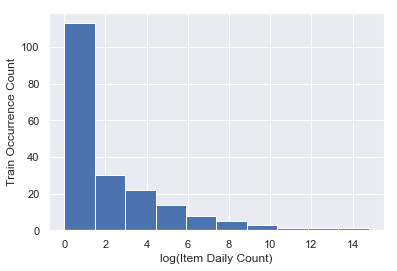

In [214]:
item_cnd_day_counts = [np.log(count) for _, count in Counter(sales_train.item_cnt_day).most_common()]
plt.hist(item_cnd_day_counts)
plt.xlabel("log(Item Daily Count)")
plt.ylabel("Train Occurrence Count")
plt.show()

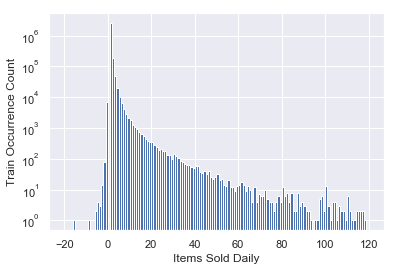

In [215]:
plt.hist([day for day in sales_train.item_cnt_day if day < 150], bins=range(-20,121), log=True)
plt.xlabel("Items Sold Daily")
plt.ylabel("Train Occurrence Count")
plt.show()
# Distribution of item_cnt_day

In [216]:
Counter(sales_train.item_cnt_day).most_common()[:5], min(sales_train.item_cnt_day), max(sales_train.item_cnt_day)

([(1.0, 2629372), (2.0, 194201), (3.0, 47350), (4.0, 19685), (5.0, 10474)],
 -22.0,
 2169.0)

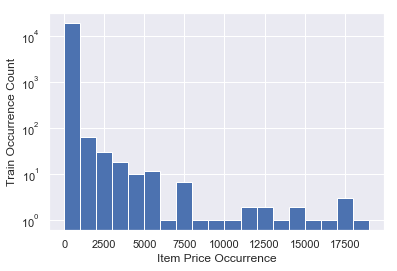

In [217]:
item_price_counts = [count for _, count in Counter(sales_train.item_price).most_common()]
plt.hist(item_price_counts, log=True, bins=range(0,20000,1000))
plt.xlabel("Item Price Occurrence")
plt.ylabel("Train Occurrence Count")
plt.show()

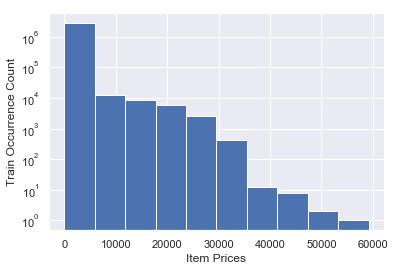

In [218]:
plt.hist([price for price in sales_train.item_price if price < 100000], log=True)
plt.xlabel("Item Prices")
plt.ylabel("Train Occurrence Count")
plt.show()
# Distribution of item_price

In [219]:
sales_train.date.iloc[0]

'02.01.2013'

In [220]:
dates = pd.to_datetime(sales_train.date, format="%d.%m.%Y")
dates[:10]

0   2013-01-02
1   2013-01-03
2   2013-01-05
3   2013-01-06
4   2013-01-15
5   2013-01-10
6   2013-01-02
7   2013-01-04
8   2013-01-11
9   2013-01-03
Name: date, dtype: datetime64[ns]

In [221]:
dates = pd.to_datetime(sales_train.date, format="%d.%m.%Y")
sales_train["year"] = [d.year for d in dates]
sales_train["month"] = [d.month for d in dates]

In [222]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month
0,02.01.2013,0,59,22154,999.00,1.00,37,2013,1
1,03.01.2013,0,25,2552,899.00,1.00,58,2013,1
2,05.01.2013,0,25,2552,899.00,-1.00,58,2013,1
3,06.01.2013,0,25,2554,1709.05,1.00,58,2013,1
4,15.01.2013,0,25,2555,1099.00,1.00,56,2013,1
5,10.01.2013,0,25,2564,349.00,1.00,59,2013,1
6,02.01.2013,0,25,2565,549.00,1.00,56,2013,1
7,04.01.2013,0,25,2572,239.00,1.00,55,2013,1
8,11.01.2013,0,25,2572,299.00,1.00,55,2013,1
9,03.01.2013,0,25,2573,299.00,3.00,55,2013,1


In [223]:
print("sales_train\n", sales_train.dtypes)
print("sales_test\n", test.dtypes)

sales_train
 date                 object
date_block_num        int64
shop_id               int64
item_id               int64
item_price          float64
item_cnt_day        float64
item_category_id      int64
year                  int64
month                 int64
dtype: object
sales_test
 ID         int64
shop_id    int64
item_id    int64
dtype: object


In [224]:
sales_test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler

from math import ceil

from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop

%matplotlib inline

In [226]:
#sales_test = sales_test.shop_id.unique()
# sales_train = sales_train[sales_train.shop_id.isin(sales_test)]
# sales_test_items = sales_test.item_id.unique()
# sales_train = sales_train[sales_train.item_id.isin(sales_test_items)]

In [227]:
sales_test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [228]:
print("There were", sales_train.shape[0], "observations in the training dataset and", sales_test.shape[0], "in the test dataset.")
print("In total there were", sales_train.shape[0] + sales_test.shape[0], "observations.")

There were 2935849 observations in the training dataset and 214200 in the test dataset.
In total there were 3150049 observations.
